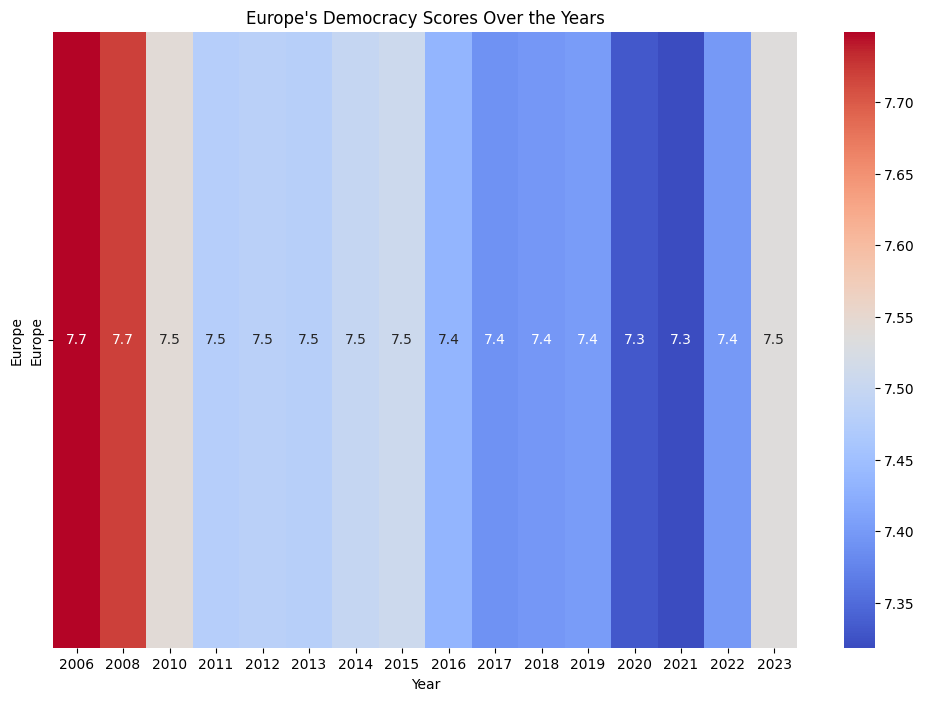

In [17]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download the dataset
path = kagglehub.dataset_download("shreyasur965/democracy-index")

# List the contents of the directory where the dataset is saved
dataset_files = os.listdir(path)

# Check if there are any files to load
if dataset_files:
    # Assuming the dataset is a CSV file and we are using the first file in the list
    csv_path = os.path.join(path, dataset_files[0])
    data = pd.read_csv(csv_path)

    # Filter the dataset to keep only rows where 'Entity' corresponds to Europe
    europe_data = data[data['Entity'] == 'Europe']

    # Check if we have a 'Year' column and 'Democracy score'
    if 'Year' in europe_data.columns and 'Democracy score' in europe_data.columns:
        # Pivot the data so that years are columns and 'Democracy score' are the values
        europe_data_pivot = europe_data.pivot(index='Entity', columns='Year', values='Democracy score')

        # Plot the heatmap for Europe's democracy scores over the years
        plt.figure(figsize=(12, 8))
        sns.heatmap(europe_data_pivot, annot=True, cmap='coolwarm', cbar=True)
        plt.title("Europe's Democracy Scores Over the Years")
        plt.xlabel('Year')
        plt.ylabel('Europe')
        plt.show()

else:
    print("No files found in the dataset directory.")
